# Read in the Mutual Information Score

In [1]:
import pandas as pd
mutual_info = pd.read_csv('../test_data/mutual_info.csv')

In [2]:
mutual_info.head()

,Unnamed: 0,gene_one,gene_two,mutual_info
0,0,0,1,0.001303
1,1,0,2,0.060653
2,2,0,3,0.000859
3,3,0,4,0.000859
4,4,0,5,0.000859


# Read in the gene annotation to access the quality of network

In [3]:
gene_anno = pd.read_csv('../test_data/gene_anno.csv', index_col = 0)

In [4]:
import pickle
with open('../test_data/gene_id.pickle', 'rb') as f:
    gid = pickle.load(f)

In [5]:
gene_anno['gene_id'] = gene_anno.index.map(gid)

In [6]:
gene_anno.head()

,nr,cog_ID,cog_category,GO,pathway,gene_id
562.10576.con.0004_41|562.10576,WP_000610758.1 fimbrial protein [Escherichia c...,COG3539,NU,"{'GO:0009289', 'GO:0007155'}",NaN,18
562.22909.con.0007_46|562.22909,WP_003582778.1 MULTISPECIES: fimbrial family p...,NaN,NaN,NaN,NaN,14
562.23190.con.0020_64|562.23190,WP_021581152.1 hypothetical protein [Escherich...,NaN,NaN,"{'GO:0009289', 'GO:0007155'}",NaN,39
NMWW01000041_2|562.19090,WP_000733565.1 MULTISPECIES: hypothetical prot...,NaN,NaN,"{'GO:0009289', 'GO:0007155'}",NaN,30
JMVG01000019_151|1438678.3,WP_001402787.1 MULTISPECIES: hypothetical prot...,NaN,NaN,NaN,NaN,23


In [7]:
gene_anno.shape

(50, 6)

In [8]:
gene_anno.set_index('gene_id', inplace = True)

# Construct gold standard pair

In [9]:
# this toy example is designed to have several GO terms only. 

In [10]:
gene_go_term = {}
for index, row in gene_anno.iterrows():
    go_terms = row['GO']
    if str(go_terms) == 'nan':
        pass
    else:
        go_terms = go_terms.split(',')
        go_terms = [term.replace('{','').replace('}','').replace('\'','').replace(' ','') for term in go_terms]
        
        gene_go_term[index] = set(go_terms)

In [11]:
gene_go_term

{18: {'GO:0007155', 'GO:0009289'},
 39: {'GO:0007155', 'GO:0009289'},
 30: {'GO:0007155', 'GO:0009289'},
 19: {'GO:0007155', 'GO:0009289'},
 13: {'GO:0007155', 'GO:0009289'},
 20: {'GO:0007155', 'GO:0009289'},
 12: {'GO:0007155', 'GO:0009289'},
 21: {'GO:0007155', 'GO:0009289'},
 37: {'GO:0005351', 'GO:0008643', 'GO:0016020'},
 46: {'GO:0005351', 'GO:0008643', 'GO:0016020'},
 28: {'GO:0005351', 'GO:0008643', 'GO:0016020'},
 31: {'GO:0005351', 'GO:0008643', 'GO:0016020'},
 29: {'GO:0005351', 'GO:0008643', 'GO:0016020'},
 24: {'GO:0005351', 'GO:0008643', 'GO:0016020'},
 2: {'GO:0005351', 'GO:0008643', 'GO:0016020'},
 34: {'GO:0005351', 'GO:0008643', 'GO:0016020'},
 33: {'GO:0005351', 'GO:0008643', 'GO:0016020'},
 43: {'GO:0005351', 'GO:0008643', 'GO:0016020'},
 44: {'GO:0005515'},
 7: {'GO:0005515'},
 17: {'GO:0005515'},
 25: {'GO:0005515'},
 49: {'GO:0005515'},
 41: {'GO:0005515'},
 6: {'GO:0005515'},
 48: {'GO:0005515'},
 45: {'GO:0005515'},
 38: {'GO:0007155', 'GO:0009289'},
 4: {'GO:

In [12]:
# define goldstandard as sharing # of go terms
from itertools import combinations
n_shared = []
for gene_pair in combinations(gene_go_term.keys(), 2):
    n_shared_term = len(gene_go_term[gene_pair[0]].intersection(gene_go_term[gene_pair[1]]))
    
    new_pair = list(gene_pair)
    new_pair.sort()
    
    n_shared.append(new_pair + [n_shared_term])
nshare = pd.DataFrame(n_shared, columns = ['gene_one','gene_two', 'no_go_term_shared'])

# read in inferred functinoal network

In [13]:
network = pd.read_csv('../test_data/mutual_info.csv', index_col = 0)

<AxesSubplot:>

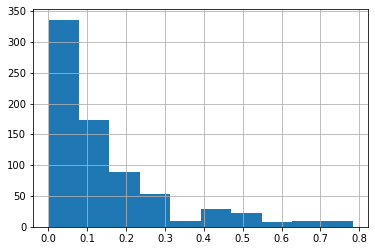

In [14]:
network['mutual_info'].hist()

In [15]:
nshare.head()

,gene_one,gene_two,no_go_term_shared
0,18,39,2
1,18,30,2
2,18,19,2
3,13,18,2
4,18,20,2


In [16]:
benchmark = pd.merge(nshare, network, left_on = ['gene_one', 'gene_two'], right_on = ['gene_one', 'gene_two'])

In [17]:
benchmark.head()

,gene_one,gene_two,no_go_term_shared,mutual_info
0,37,46,3,0.659678
1,31,37,3,0.698529
2,29,37,3,0.398655
3,24,37,3,0.574211
4,2,37,3,0.716142


<AxesSubplot:>

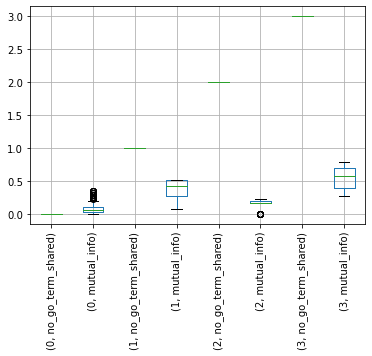

In [18]:
benchmark.iloc[:,2:].groupby('no_go_term_shared').boxplot(subplots = False, rot = 90)

<AxesSubplot:xlabel='no_go_term_shared', ylabel='mutual_info'>

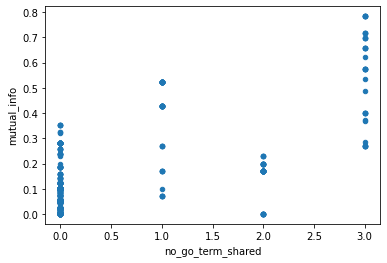

In [19]:
benchmark.plot(kind = 'scatter', x = 'no_go_term_shared', y = 'mutual_info')